## 🟠**FASE IV: RF MODEL**🟠

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings #Advertencias
warnings.filterwarnings('ignore')

# Carga de parquet preprocesado
path = 'monopoly_cleaned_parquet'
monopoly = pd.read_parquet(path)

In [2]:
monopoly.shape

(51121, 66)

In [3]:
monopoly.head(10)

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
0,160.0,1.0,13.0,43.0,601932.8,130.0,1.0,1.0,0.0,0.0,...,0.0,34699.666667,0.000000,29333.333333,0.0,908079.416667,0.000000,913045.583333,53874.250000,0.000000
1,160.0,0.0,13.0,46.0,143640.0,69.0,1.0,0.0,0.0,0.0,...,0.0,17597.250000,45699.212500,167416.666667,0.0,460136.500000,58.904167,428734.833333,119963.916667,84.508333
2,170.0,0.0,13.0,45.0,929106.0,24.0,1.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,68325.750000,0.0,8510.750000,0.000000,25294.500000,0.000000,0.000000
3,151.0,0.0,13.0,46.0,172447.0,134.0,0.0,1.0,0.0,1.0,...,0.0,2706.500000,0.000000,57083.333333,0.0,341916.833333,0.000000,344417.500000,31825.250000,0.000000
4,170.0,0.0,13.0,46.0,805250.0,116.0,0.0,1.0,1.0,0.0,...,0.0,6227.666667,0.000000,291317.166667,0.0,291684.500000,0.000000,83849.250000,402597.666667,0.000000
5,170.0,0.0,13.0,47.0,707664.0,67.0,1.0,1.0,0.0,0.0,...,0.0,30817.583333,0.000000,67995.500000,0.0,66314.083333,0.000000,761.500000,68509.250000,0.000000
6,811.0,0.0,13.0,48.0,1022833.0,21.0,1.0,0.0,1.0,0.0,...,0.0,29313.500000,0.000000,229371.416667,0.0,360648.416667,0.000000,384923.583333,72453.333333,0.000000
7,170.0,0.0,13.0,46.0,544956.4,69.0,0.0,1.0,1.0,0.0,...,0.0,5070.750000,0.000000,21030.500000,0.0,104602.666667,0.000000,108996.833333,30391.000000,0.000000
8,170.0,0.0,13.0,49.0,1171066.0,33.0,0.0,0.0,0.0,0.0,...,0.0,14785.000000,5715.304167,46666.666667,0.0,479423.416667,10.843333,479423.416667,24828.666667,10.843333
9,170.0,1.0,13.0,44.0,964387.0,23.0,1.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,354215.083333,0.0,55744.750000,0.000000,50686.916667,16111.000000,0.000000


#### 🎄*MODELO RANDOM FOREST*🎄

### 🔶REG--MODELS 

#### ➡️MODEL 1 🎄-REGRESSION

1️⃣ - `Definición de variables:`

In [4]:
X = pd.DataFrame(monopoly.drop(columns=['Renta']))
X.head()

,Subsegmento,Sexo,Region,Edad,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
0,160.0,1.0,13.0,43.0,130.0,1.0,1.0,0.0,0.0,1.0,...,0.0,34699.666667,0.0000,29333.333333,0.0,908079.416667,0.000000,913045.583333,53874.250000,0.000000
1,160.0,0.0,13.0,46.0,69.0,1.0,0.0,0.0,0.0,1.0,...,0.0,17597.250000,45699.2125,167416.666667,0.0,460136.500000,58.904167,428734.833333,119963.916667,84.508333
2,170.0,0.0,13.0,45.0,24.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,0.0000,68325.750000,0.0,8510.750000,0.000000,25294.500000,0.000000,0.000000
3,151.0,0.0,13.0,46.0,134.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2706.500000,0.0000,57083.333333,0.0,341916.833333,0.000000,344417.500000,31825.250000,0.000000
4,170.0,0.0,13.0,46.0,116.0,0.0,1.0,1.0,0.0,1.0,...,0.0,6227.666667,0.0000,291317.166667,0.0,291684.500000,0.000000,83849.250000,402597.666667,0.000000


In [5]:
Y = pd.DataFrame(monopoly['Renta'])
Y.head()

,Renta
0,601932.8
1,143640.0
2,929106.0
3,172447.0
4,805250.0


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state=52)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

2️⃣ - `Modelo:`

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=10)

3️⃣ - `Entrenamiento:`

In [10]:
modelo_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10)

4️⃣ - `Predicción:`

In [11]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf.predict(X_test)

5️⃣ - `Métricas:` Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [12]:
import math

In [13]:
MAE_RF1 = mean_absolute_error(Y_test, Y_hat)
MSE_RF1 =  mean_squared_error(Y_test, Y_hat)
RMSE_RF1 = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF1 = r2_score(Y_test, Y_hat)

print("MAE: %.2f" % MAE_RF1)
print("MSE: %.2f" % MSE_RF1)
print("RMSE: %.2f" % RMSE_RF1)
print('r2: %.2f' % r2_RF1)

MAE: 168825.84
MSE: 77569410783.52
RMSE: 278512.86
r2: 0.41


⛔- `Resultado:`
El Modelo 1 muestra un rendimiento razonable en la predicción de la variable "Renta". Tiene un valor de R2 de 0.41, lo que indica que el modelo explica el 41% de la variabilidad en la variable de respuesta. El RMSE es moderadamente alto, lo que sugiere cierto grado de error en las predicciones.

#### ➡️MODEL 2 🎄-REGRESSION

2️⃣ - `Modelo:`

In [14]:
modelo_rf2 = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2,min_samples_leaf=2, max_features='sqrt')

3️⃣ - `Entrenamiento:`

In [15]:
modelo_rf2.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2)

4️⃣ - `Predicción:`

In [16]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf2.predict(X_test)

5️⃣ - `Métricas:`

In [17]:
MAE_RF2 = mean_absolute_error(Y_test, Y_hat)
MSE_RF2 =  mean_squared_error(Y_test, Y_hat)
RMSE_RF2 = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF2 = r2_score(Y_test, Y_hat)

print("MAE2_M2: %.2f" % MAE_RF2)
print("MSE2_M2: %.2f" % MSE_RF2)
print("RMSE_M2: %.2f" % RMSE_RF2)
print('r2_M2: %.2f' % r2_RF2)

MAE2_M2: 171583.13
MSE2_M2: 79851672703.31
RMSE_M2: 282580.38
r2_M2: 0.40


⛔- `Resultado:`
El Modelo 2 tiene resultados similares a los del Modelo 1 en términos de MAE, MSE y RMSE, aunque con un valor ligeramente más bajo de R2 (0.40). Esto indica que el modelo explica el 40% de la variabilidad en la variable de respuesta.

#### ➡️MODEL 3 🎄-REGRESSION

2️⃣ - `Modelo:`

In [18]:
# HIPERPARAMETROS -- GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Crear una instancia del modelo Random Forest
modelo = RandomForestRegressor(random_state=123)

# GridSearchCV -- mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Obtener la mejor combinación de hiperparámetros
better_params = grid_search.best_params_
better_params

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [19]:
# Crear un modelo Random Forest con los mejores parámetros
modelo_rf3 = RandomForestRegressor(**better_params, random_state=123)

3️⃣ - `Entrenamiento:`

In [20]:
modelo_rf3.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      random_state=123)

4️⃣ - `Predicción:` 

In [21]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf3.predict(X_test)

5️⃣ - `Métricas:`

In [22]:
MAE_RF3 = mean_absolute_error(Y_test, Y_hat)
MSE_RF3 =  mean_squared_error(Y_test, Y_hat)
RMSE_RF3 = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF3 = r2_score(Y_test, Y_hat)

print("MAE2_M3: %.2f" % MAE_RF3)
print("MSE2_M3: %.2f" % MSE_RF3)
print("RMSE_M3: %.2f" % RMSE_RF3)
print('r2_M3: %.2f' % r2_RF3)

MAE2_M3: 167522.50
MSE2_M3: 76222349132.35
RMSE_M3: 276083.95
r2_M3: 0.42


✅- `Resultado:`
El Modelo 3 se destaca como el mejor entre los modelos anteriores. Tiene el valor más bajo de MAE, MSE y RMSE, indicando una capacidad superior para predecir la variable "Renta". Además, posee el valor más alto de R2 (0.42), lo que dice que el modelo toma un 42% de la variabilidad en prediccion de la variable.

#### ➡️MODEL 4 🎄-REGRESSION

2️⃣ - `Modelo:`

In [23]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators':(50, 100),  
    'max_depth': [None, 10, 20],  
    'min_samples_split':(2, 10),  
    'min_samples_leaf':(1, 4),  
    'max_features': ['auto', 'sqrt']  
}

# Crear una instancia del modelo Random Forest
modelo = RandomForestRegressor(random_state=123)

# RandomizedSearchCV -- búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_dist, n_iter=100, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, Y_train)

# Obtener la mejor combinación de hiperparámetros
better_params = random_search.best_params_
better_params

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [24]:
# Crear un modelo Random Forest con los mejores parámetros
modelo_rf4 = RandomForestRegressor(**better_params, random_state=123)

3️⃣ - `Entrenamiento:`

In [25]:
modelo_rf4.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, random_state=123)

4️⃣ - `Predicción:`

In [26]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf4.predict(X_test)

5️⃣ - `Métricas:`

In [27]:
MAE_RF4 = mean_absolute_error(Y_test, Y_hat)
MSE_RF4 =  mean_squared_error(Y_test, Y_hat)
RMSE_RF4 = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF4 = r2_score(Y_test, Y_hat)

print("MAE2_M4: %.2f" % MAE_RF4)
print("MSE2_M4: %.2f" % MSE_RF4)
print("RMSE_M4: %.2f" % RMSE_RF4)
print('r2_M4: %.2f' % r2_RF4)

MAE2_M4: 168022.04
MSE2_M4: 76458832343.25
RMSE_M4: 276511.90
r2_M4: 0.42


⛔- `Resultado:`
El Modelo 4 muestra resultados similares a los del Modelo 3 en términos de MAE, MSE, RMSE y R2. Ambos modelos tienen un R2 de 0.42, lo que dice que el 42% de la variabilidad se ecplica en respuesta de predicción.

✅- `Comparacion de modelos:`
En resumen, el Modelo 3 (MDL3_RF) se destaca como el mejor modelo entre los cuatro evaluados debido a su capacidad superior para predecir la variable "Renta" con un valor más bajo de MAE, MSE y RMSE y un R2 más alto. Sin embargo, los Modelos 3 y 4 también ofrecen resultados competitivos y similares en términos de métricas de desempeño, por lo cual por unas cifras minimas entre los dos modelos se ah decidido dejar al modelo 3 como modelo ganador.

| Modelo   | MAE        | MSE         | RMSE       | r2   |
|----------|------------|-------------|------------|-----|
| Modelo 1 | 168532.67  | 77228455967 | 277900.08  | 0.42|
| Modelo 2 | 172190.31  | 80369659360 | 283495.43  | 0.39|
| Modelo 3 | 167522.50  | 76222349132 | 276083.95  | 0.42|
| Modelo 4 | 168022.04  | 76458832343 | 276511.90  | 0.42|

In [ ]:
import joblib as jb

# Guardar el modelo
jb.dump(modelo_rf3, "models/modelo_rf3_regress.pkl")

['models/modelo_rf3_regress.pkl']

### 🔶CLASS--MODELS 

#### ➡️MODEL 1 🎄-CLASSIFIER

1️⃣ - `Definición de variables:`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
print(monopoly.groupby('Internauta').size())

Internauta
0.0    16142
1.0    34979
dtype: int64


In [ ]:
X = pd.DataFrame(monopoly.drop(columns=['Internauta']))
X.head()

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Adicional,Dualidad,Monoproducto,Ctacte,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
0,160.0,1.0,13.0,43.0,601932.8,130.0,1.0,0.0,0.0,1.0,...,0.0,34699.666667,0.0000,29333.333333,0.0,908079.416667,0.000000,913045.583333,53874.250000,0.000000
1,160.0,0.0,13.0,46.0,143640.0,69.0,0.0,0.0,0.0,1.0,...,0.0,17597.250000,45699.2125,167416.666667,0.0,460136.500000,58.904167,428734.833333,119963.916667,84.508333
2,170.0,0.0,13.0,45.0,929106.0,24.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,0.0000,68325.750000,0.0,8510.750000,0.000000,25294.500000,0.000000,0.000000
3,151.0,0.0,13.0,46.0,172447.0,134.0,1.0,0.0,1.0,0.0,...,0.0,2706.500000,0.0000,57083.333333,0.0,341916.833333,0.000000,344417.500000,31825.250000,0.000000
4,170.0,0.0,13.0,46.0,805250.0,116.0,1.0,1.0,0.0,1.0,...,0.0,6227.666667,0.0000,291317.166667,0.0,291684.500000,0.000000,83849.250000,402597.666667,0.000000


In [ ]:
Y = pd.DataFrame(monopoly['Internauta'])
Y.head()

,Internauta
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [ ]:
Y.groupby('Internauta').size()

Internauta
0.0    16142
1.0    34979
dtype: int64

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.8, random_state=52)

2️⃣ - `Modelo:`

In [ ]:
modelo_cf = RandomForestClassifier(n_estimators=50, max_depth=10)

3️⃣ - `Entrenamiento:`

In [ ]:
modelo_cf.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=10, n_estimators=50)

4️⃣ - `Predicción:`

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_cf.predict(Xtest)

5️⃣ - `Métricas:`

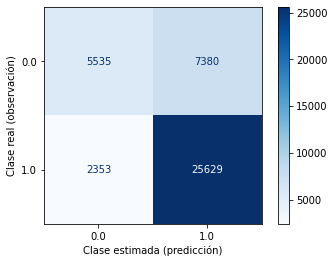

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_cf.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
Tasa_FP_1 = FP/(FP+VN)
Tasa_FN_1 = FN/(FN+VP)

print('METRICAS DE DESEMPEÑO | MDL1_CF')
print("--------------------------------------")
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')
print("--------------------------------------")
print("Error tipo I: %.2f" % Tasa_FP_1)
print("Error tipo II: %.2f" % Tasa_FN_1)

METRICAS DE DESEMPEÑO | MDL1_CF
--------------------------------------
Verdaderos positivos (VP): 25629
Falsos positivos (FP): 7380
Verdaderos negativos (VN): 5535
Falsos negativos (FN): 2353
--------------------------------------
Error tipo I: 0.57
Error tipo II: 0.08


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

         0.0       0.70      0.43      0.53     12915
         1.0       0.78      0.92      0.84     27982

    accuracy                           0.76     40897
   macro avg       0.74      0.67      0.69     40897
weighted avg       0.75      0.76      0.74     40897



In [ ]:
SCORE_01 = modelo_cf.score(Xtest,Ytest)
print("ACCURACY: %.2f" % SCORE_01)

#F1-Score
f1_01 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_01)

ACCURACY: 0.76
F1-Score: 0.84


⛔- `Resultado:`
El Modelo 1 ofrece un buen rendimiento en términos de precisión y F1-Score, lo que sugiere una capacidad sólida para clasificar correctamente las observaciones. Sin embargo, el Error tipo I es relativamente alto, lo que significa una tasa considerable de falsos positivos. Además, el Error tipo II es bajo, indicando una tasa baja de falsos negativos.

#### ➡️MODEL 2 🎄-CLASSIFIER

2️⃣ - `Modelo:`

In [ ]:
modelo_cf2 = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2,min_samples_leaf=2,class_weight='balanced')

3️⃣ - `Entrenamiento:`

In [ ]:
modelo_cf2.fit(Xtrain, Ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, n_estimators=50)

4️⃣ - `Predicción:`

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_cf2.predict(Xtest)

5️⃣ - `Métricas:`

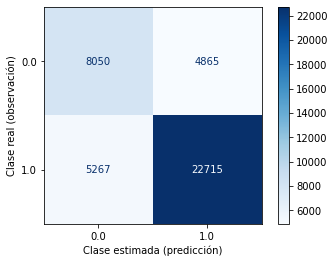

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_cf2.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
Tasa_FP_2 = FP/(FP+VN)
Tasa_FN_2 = FN/(FN+VP)

print('METRICAS DE DESEMPEÑO | MDL2_CF')
print("--------------------------------------")
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')
print("--------------------------------------")
print("Error tipo I: %.2f" % Tasa_FP_2)
print("Error tipo II: %.2f" % Tasa_FN_2)

METRICAS DE DESEMPEÑO | MDL2_CF
--------------------------------------
Verdaderos positivos (VP): 22715
Falsos positivos (FP): 4865
Verdaderos negativos (VN): 8050
Falsos negativos (FN): 5267
--------------------------------------
Error tipo I: 0.38
Error tipo II: 0.19


In [ ]:
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61     12915
         1.0       0.82      0.81      0.82     27982

    accuracy                           0.75     40897
   macro avg       0.71      0.72      0.72     40897
weighted avg       0.75      0.75      0.75     40897



In [ ]:
#Accuracy
SCORE_02 = modelo_cf2.score(Xtest,Ytest)
print("ACCURACY: %.2f" % SCORE_02)

#F1-Score
f1_02 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_02)

ACCURACY: 0.75
F1-Score: 0.82


⛔- `Resultado:` El Modelo 2 mejora la tasa de Error tipo I en comparación con el Modelo 1, reduciendo la proporción de falsos positivos. Sin embargo, el Error tipo II es más alto, lo que indica un aumento en la tasa de falsos negativos. El Accuracy y F1-Score siguen siendo sólidos, aunque ligeramente inferiores en comparación con el Modelo 1.


#### ➡️MODEL 3 🎄-CLASSIFIER

2️⃣ - `Modelo:`

In [ ]:
# Ajuste de hiperparámetros utilizando GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 5,7],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear una instancia del modelo Random Forest
modelo = RandomForestClassifier(class_weight='balanced', random_state=123)

# Utilizar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(Xtrain, Ytrain)

# Obtener la mejor combinación de hiperparámetros
better_params = grid_search.best_params_
better_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
# Crear un modelo Random Forest con los mejores parámetros
modelo_cf3 = RandomForestClassifier(**better_params, class_weight='balanced')

3️⃣ - `Entrenamiento:` Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_cf3.fit(Xtrain, Ytrain)

RandomForestClassifier(class_weight='balanced', min_samples_split=3)

4️⃣ - `Predicción:`

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_cf3.predict(Xtest)

5️⃣ - `Métricas:`

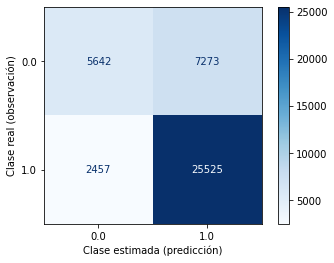

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_cf3.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
Tasa_FP_3 = FP/(FP+VN)
Tasa_FN_3 = FN/(FN+VP)

print('METRICAS DE DESEMPEÑO | MDL3_CF')
print("--------------------------------------")
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')
print("--------------------------------------")
print("Error tipo I: %.2f" % Tasa_FP_3)
print("Error tipo II: %.2f" % Tasa_FN_3)

METRICAS DE DESEMPEÑO | MDL3_CF
--------------------------------------
Verdaderos positivos (VP): 22715
Falsos positivos (FP): 4865
Verdaderos negativos (VN): 8050
Falsos negativos (FN): 5267
--------------------------------------
Error tipo I: 0.38
Error tipo II: 0.19


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

         0.0       0.70      0.44      0.54     12915
         1.0       0.78      0.91      0.84     27982

    accuracy                           0.76     40897
   macro avg       0.74      0.67      0.69     40897
weighted avg       0.75      0.76      0.74     40897



In [ ]:
#Accuracy
SCORE_03 = modelo_cf3.score(Xtest,Ytest)
print("ACCURACY: %.2f" % SCORE_03)

#F1-Score
f1_03 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_03)

ACCURACY: 0.76
F1-Score: 0.84


✅- `Resultados:`El Modelo 3, que fue ajustado utilizando GridSearchCV para encontrar la mejor combinación de hiperparámetros, ofrece resultados similares al Modelo 2 en términos de Error tipo I y Error tipo II, Accuracy y F1-Score. Sin embargo, debido al ajuste de hiperparámetros, el Modelo 3 puede considerarse más robusto y generalizable a nuevos datos.


✅- `Comparacion de modelos:` Aunque los modelos 2 y 3 muestran resultados similares en términos de error tipo I, error tipo II, accuracy y F1-Score, el Modelo 3 ha sido ajustado utilizando GridSearchCV para encontrar la mejor combinación de hiperparámetros, lo que sugiere una mayor robustez en términos de generalización a nuevos datos. Por lo tanto, el Modelo 3 puede considerarse como el mejor modelo entre los tres evaluados.

| Modelo   | Error tipo I | Error tipo II | Accuracy | F1-Score |
|----------|--------------|--------------|----------|----------|
| MDL1_CF  | 0.57         | 0.08         | 0.76     | 0.84     |
| MDL2_CF  | 0.38         | 0.19         | 0.75     | 0.82     |
| MDL3_CF  | 0.38         | 0.19         | 0.76     | 0.84     |

In [ ]:
# Guardar el modelo
jb.dump(modelo_cf3, "models/modelo_rf3_class.pkl")

['models/modelo_rf3_class.pkl']